### DTSA-5509 Supervised Learning Final Project

# Introduction

Obesity has been classified as a global epidemic by the World Health Organization and affects over one billion people worldwide. Obesity is typically defined by a body mass index (BMI) of 30 or higher. The goal of this project is to build a supervised machine learning model to predict whether an individual is obesed or healthy based on various factors.

The dataset was obtained from Kaggle (https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset/data) and contains data from individuals in Mexico, Peru, and Colombia, covering lifestyle and health-realted features:
- **Number of Instances:** 2,111
- **Number of Features:** 17
- **Target Variable:** NObeyesdad
- **Feature Descriptions:**
    - Gender – Male or Female.
    - Age – The person’s age in years.
    - Height - Height in meters.
    - Weight – Weight in kilograms.
    - family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
    - FAVC – If the person frequently consumes high-calorie foods (yes/no).
    - FCVC – Frequency of vegetable consumption (scale from 1 to 3).
    - NCP – Number of main meals per day.
    - CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
    - SMOKE – Whether the person smokes (yes/no).
    - CH2O – Daily water intake (scale from 1 to 3).
    - SCC – If the person monitors their calorie intake (yes/no).
    - FAF – Physical activity frequency (scale from 0 to 3).
    - TUE – Time spent using technology (scale from 0 to 3).
    - CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
    - MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
    - NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

# Exploratory Data Analysis

### Import Libaries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualizations style
sns.set(style="whitegrid")

In [2]:
# Load Dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the first few rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Understanding the Data

In [3]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Summary statistics
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Check for Missing Values and Duplicates

In [5]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
print("\nNumber of Duplicate Rows:")
df.duplicated().sum()

print("\nRemove Duplicate Rows and Check again:")
df.drop_duplicates(inplace=True)
df.duplicated().sum()



Number of Duplicate Rows:

Remove Duplicate Rows and Check again:


0

### Data Visualization
Before we encode the categorical data, let's visualize some of the features.

**Age Distribution**

The histogram with a Kernel Density Estimation displays the age distribution in the dataset and helps visualize the most common age groups in the study.

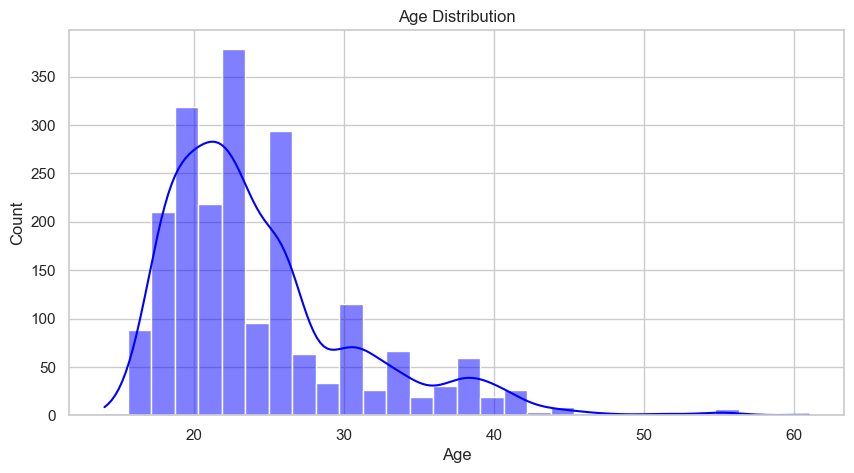

In [7]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Gender Distribution**

The count plot above shows the number of male and female participants where an imbalance in the data may impact analysis results.

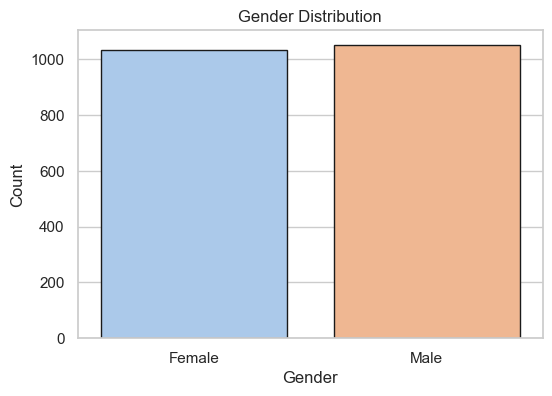

In [8]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="pastel", edgecolor=".10", hue='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**BMI Distribtuion**

The Body Mass Index (BMI) is a key (albeit simple) metric commonly used for obesity classification. It can be calculated by dividing the an individual's weight with their height. The following BMI histogram helps identify the range of the BMI values most common in the dataset.


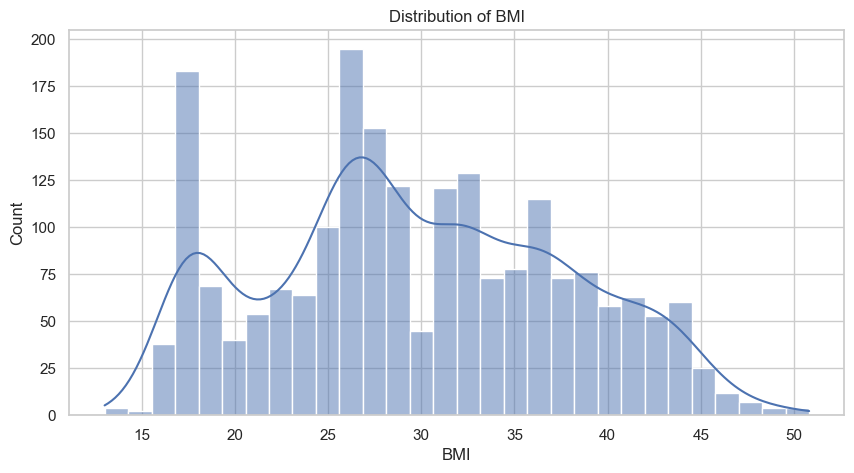

In [9]:
# Distribution of BMI (Body Mass Index)
df["BMI"] = df["Weight"] / (df["Height"] ** 2)  # Calculate BMI

plt.figure(figsize=(10, 5))
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

**Family History**

As the histogram below shows, there is a noticeable trend suggesting some correlation between obesity and family history, whether it be shared lifestyle or genetic disposition.

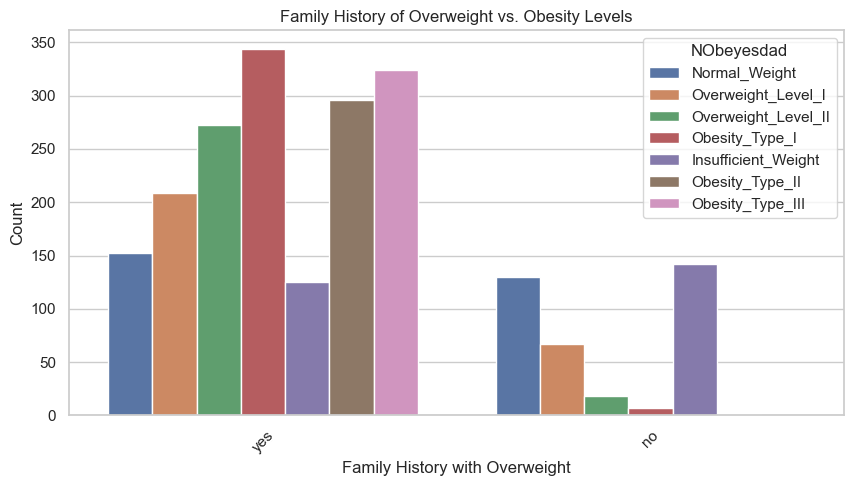

In [10]:
# Family History with Overweight vs. Obesity Levels
plt.figure(figsize=(10, 5))
sns.countplot(x="family_history_with_overweight", hue="NObeyesdad", data=df)
plt.title("Family History of Overweight vs. Obesity Levels")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Physical Activity vs Obesity Levels**
The box plot below shows the frequency of physical activity (FAF) across the different obesity levels. This helps identify whether there is a connection between physical activity and obesity.

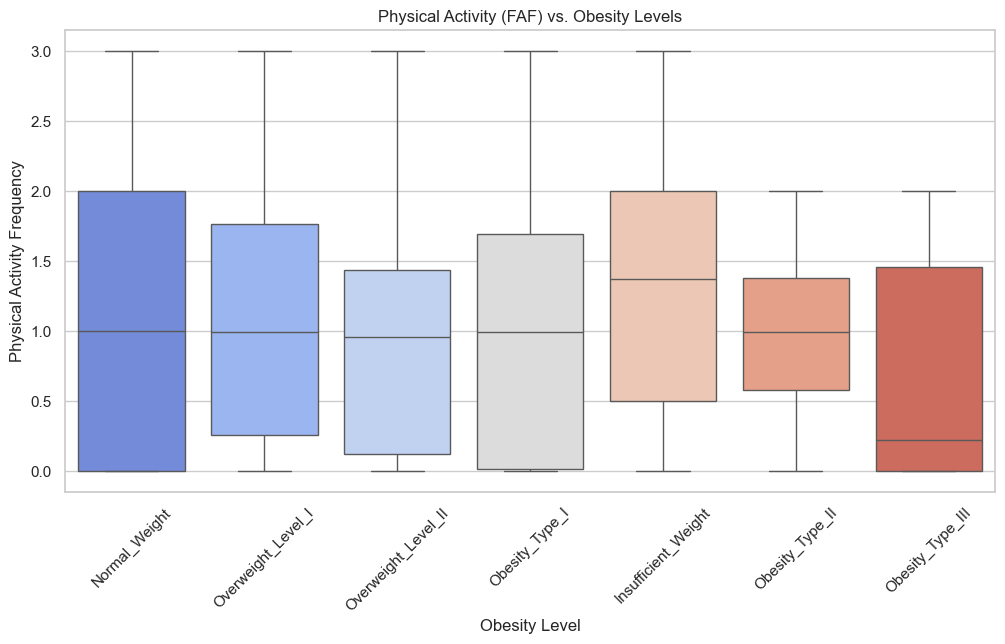

In [11]:
# Physical Activity vs. Obesity Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x="NObeyesdad", y="FAF", data=df, palette="coolwarm", hue="NObeyesdad")
plt.title("Physical Activity (FAF) vs. Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Physical Activity Frequency")
plt.xticks(rotation=45)
plt.show()

**Categorical Variable Encoding**

In [12]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
        
        print(f"Column: {column}")
        print(f"Unique Values before encoding: {df[column].astype('category').cat.categories.tolist()}")
        print(f"Unique Values after encoding: {df[column].unique()}\n")

Column: Gender
Unique Values before encoding: [0, 1]
Unique Values after encoding: [0 1]

Column: family_history_with_overweight
Unique Values before encoding: [0, 1]
Unique Values after encoding: [1 0]

Column: FAVC
Unique Values before encoding: [0, 1]
Unique Values after encoding: [0 1]

Column: CAEC
Unique Values before encoding: [0, 1, 2, 3]
Unique Values after encoding: [2 1 0 3]

Column: SMOKE
Unique Values before encoding: [0, 1]
Unique Values after encoding: [0 1]

Column: SCC
Unique Values before encoding: [0, 1]
Unique Values after encoding: [0 1]

Column: CALC
Unique Values before encoding: [0, 1, 2, 3]
Unique Values after encoding: [3 2 1 0]

Column: MTRANS
Unique Values before encoding: [0, 1, 2, 3, 4]
Unique Values after encoding: [3 4 0 2 1]

Column: NObeyesdad
Unique Values before encoding: [0, 1, 2, 3, 4, 5, 6]
Unique Values after encoding: [1 5 6 2 0 3 4]



### Correlation Analysis

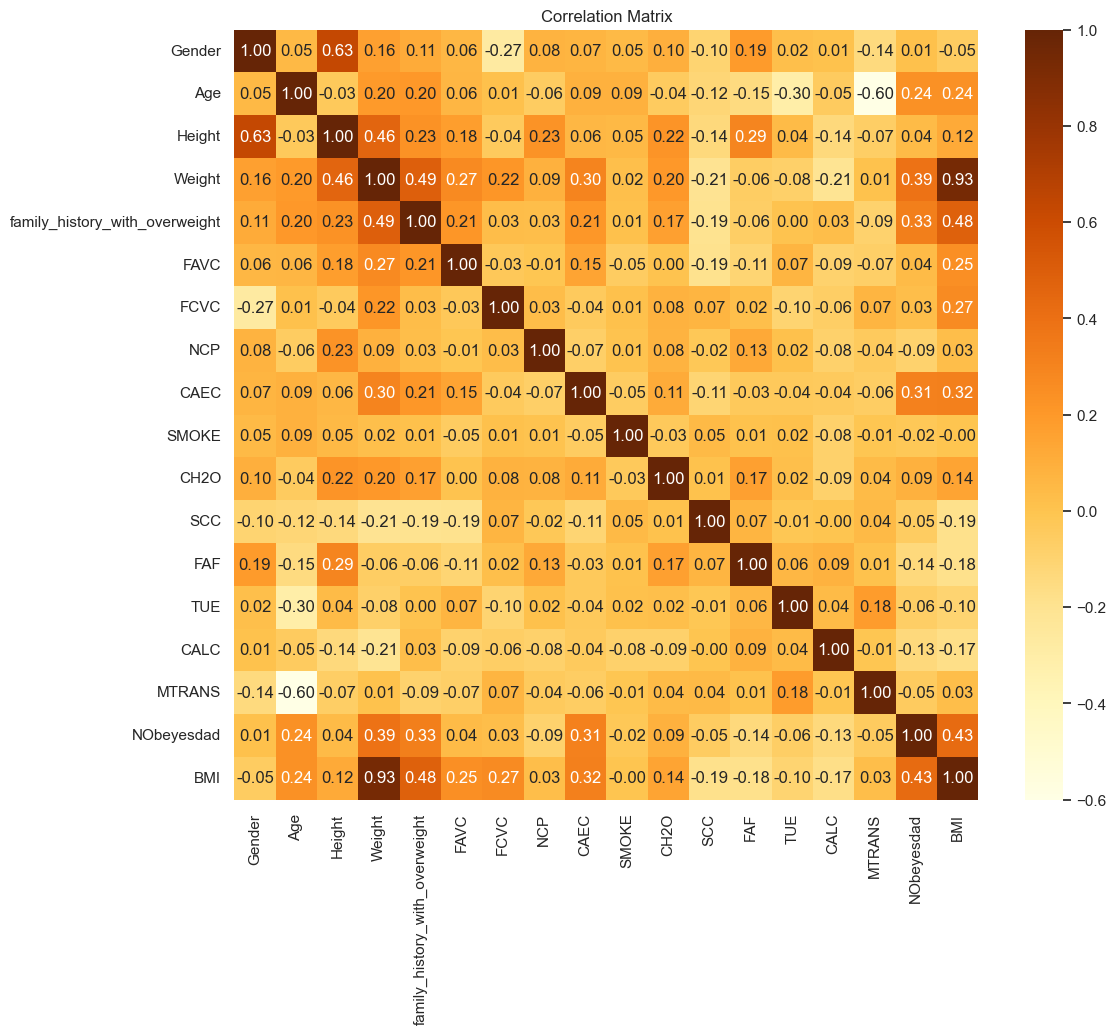

In [13]:
# Correlation matrix
# df.corr()
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlOrBr')
plt.title('Correlation Matrix')
plt.show()

### Target Variable (Outcome) Correlations
From the correlation matrix, we can see that the top 5 features, with respect to the target variable NObeyesdad, are Weight, family_history_with_overweight, CAEC, and Age. All of these features are positively correlated while CALC, NCP, and CH2O are the top 3 negatively correlated features.

### Distribution of Target Variable

2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: NObeyesdad, dtype: int64


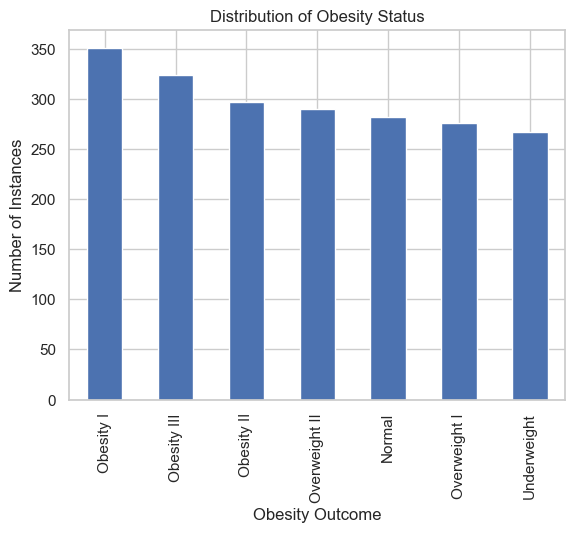

In [22]:
class_counts = df['NObeyesdad'].value_counts()
print(class_counts)

label_map = {
    0: "Underweight",
    1: "Normal",
    2: "Obesity I",
    3: "Obesity II",
    4: "Obesity III",
    5: "Overweight I",
    6: "Overweight II"
}
renamed_counts = class_counts.rename(index=label_map)

# Plot distribution
ax = renamed_counts.plot(kind='bar')
plt.title('Distribution of Obesity Status')
plt.xlabel('Obesity Outcome')
plt.ylabel('Number of Instances')
plt.show()

# Data Preprocessing

Categorical variables were already converted into numerical representations using label encoding above to help with the data visualization. Label encoding assigns a unique integer to each category and ensures that machine learning models can effectively process data.

After encoding the variables, the snippet below then separates the data into features X and target y.

### Training and Testing Data Split
Split the data into training and testing sets.

In [15]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1669 samples
Testing set size: 418 samples


# Model Selection and Training

In [16]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning with Grid Search
hyper_tuning = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=hyper_tuning,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Explanation**

Our model selection is the Random Forest Classification, and the code above performs hyperparameter tuning using Grid Search. Grid Search is systematically tests multiple combinations of hyperparameter values and find the best configuration while optimizing for performance.

The following are the hyperparameters that are being tuned:
- **n_estimators:** number of trees in the forest.
- **max_depth:** maximum depth of each tree.
- **min_samples_split:** minimum sample size required to split an internal node.
- **min_samples_leaf:** minimum sample size requiared to be at a leaf node.

Cross-validation (3 folds) evaluates each combination of the parameters and ensure that the model performs well to unseen data.

In [17]:
# Best estimator from Grid Search
best_rf_first = grid_search.best_estimator_

# Train model
best_rf_first.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

# Results

### Model Performance on Test Set

In [18]:
# Predictions
y_pred = best_rf_first.predict(X_test)
y_pred_proba = best_rf_first.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        57
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       1.00      0.96      0.98        55
           6       0.97      0.98      0.97        58

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



**Note:**
    0: "Underweight",
    1: "Normal",
    2: "Obesity I",
    3: "Obesity II",
    4: "Obesity III",
    5: "Overweight I",
    6: "Overweight II"

### Analysis of the Results

**OVerall Metrics**
1. **Accuracy:**
    - The model correctly classifies 99% of the insances.
    - But, this may be misleading since the dataset is a bit imbalanced.
2. **Macro Average:**
    - **Precision:** 0.99
    - **Recall:** 0.99
    - **F1-Score:** 0.99
3. **Weighted Average:**
    - **Precision:** 0.99
    - **Recall:** 0.99
    - **F1-Score:** 0.99


### Confusion Matrix

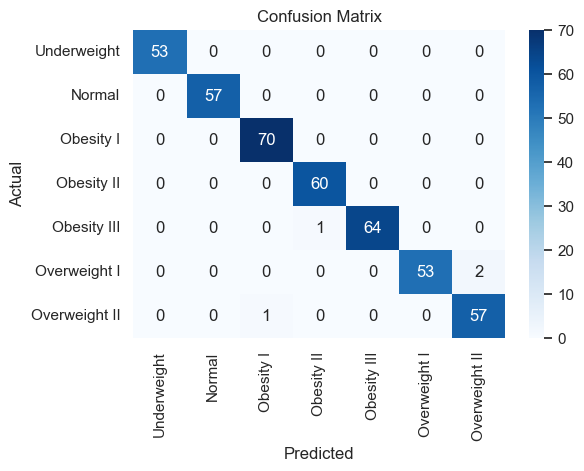

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
label_map = {
    0: "Underweight",
    1: "Normal",
    2: "Obesity I",
    3: "Obesity II",
    4: "Obesity III",
    5: "Overweight I",
    6: "Overweight II"
}
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Underweight', 'Normal', 'Obesity I', 'Obesity II',
                        'Obesity III', 'Overweight I', 'Overweight II'],
            yticklabels=['Underweight', 'Normal', 'Obesity I', 'Obesity II',
                        'Obesity III', 'Overweight I', 'Overweight II'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Observations

The model performed well relatively for every class with only 4 total misclassification. 

# Conclusion

The Random Forest model shows strong performance for all of the six classes with only four misclassifications. Even among the misclassifications, it was mostly between the various Overweight and Obesity levels. One thing to consider is that while the model is very accurate for predicting obesity, the imbalance in the data may make the results a bit misleading.